In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import seaborn as sns

In [0]:
import os
import shutil
import random

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
# Checking directories

%cd '/content/drive/My Drive/Colab Notebooks'
!ls

/content/drive/My Drive/Colab Notebooks
data  data-img	img_region.csv	info.csv  mini-project-draft.ipynb  split-img


In [0]:
# Create path variables

import pathlib

path = pathlib.Path('/content/drive/My Drive/Colab Notebooks')
# path_imgs = path/'cnsifd-imgs'
path_north = path/'data'/'north'
path_south = path/'data'/'south'

In [0]:
#
# Read data from .csv

info = pd.read_csv('info.csv')
info

,src-data,region,gender,age,weight,height,percentage-correct
0,1,1.0,1,26.0,NaN,NaN,0.873684
1,1,NaN,1,25.0,NaN,NaN,NaN
2,1,1.0,1,27.0,NaN,NaN,0.659794
3,1,NaN,1,24.0,NaN,NaN,NaN
4,1,0.0,1,23.0,NaN,NaN,0.811765
5,1,0.0,1,28.0,NaN,NaN,0.258427
6,1,NaN,1,20.0,NaN,NaN,NaN
7,1,0.0,1,21.0,NaN,NaN,0.842697
8,1,0.0,1,18.0,NaN,NaN,NaN
9,1,NaN,1,24.0,NaN,NaN,NaN


In [0]:
#
info.count()

src-data              1647
region                1542
gender                1647
age                    459
weight                 253
height                 218
percentage-correct    1423
dtype: int64

In [0]:
info_not_null = info[pd.notnull(info['region'])]
info_not_null

,src-data,region,gender,age,weight,height,percentage-correct
0,1,1.0,1,26.0,NaN,NaN,0.873684
2,1,1.0,1,27.0,NaN,NaN,0.659794
4,1,0.0,1,23.0,NaN,NaN,0.811765
5,1,0.0,1,28.0,NaN,NaN,0.258427
7,1,0.0,1,21.0,NaN,NaN,0.842697
8,1,0.0,1,18.0,NaN,NaN,NaN
10,1,0.0,1,29.0,NaN,NaN,NaN
11,1,0.0,1,21.0,NaN,NaN,NaN
12,1,0.0,1,21.0,NaN,NaN,NaN
13,1,0.0,1,22.0,NaN,NaN,0.775281


In [0]:
info_not_null.count()

src-data              1542
region                1542
gender                1542
age                    354
weight                 202
height                 179
percentage-correct    1423
dtype: int64

In [0]:
info_not_null.groupby('region').count()

,src-data,gender,age,weight,height,percentage-correct
region,,,,,,
0.0,760,760,208,111,98,682
1.0,782,782,146,91,81,741


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


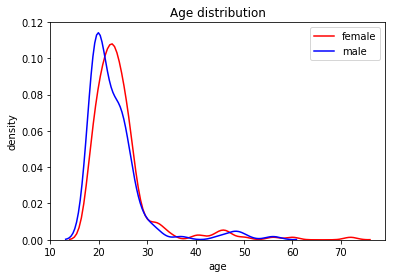

In [0]:
# info_not_null.groupby('gender').age.plot(kind='kde')

info_not_null_age = info_not_null[pd.notnull(info['age'])]

sns.kdeplot(info_not_null_age.age[info_not_null.gender==1], color='r', label='female')
sns.kdeplot(info_not_null_age.age[info_not_null.gender==0], color='b', label='male')

plt.xlabel('age')
plt.ylabel('density')
plt.title('Age distribution')

# plt.savefig('age_dist.png', dpi=250)
plt.show()

In [0]:
reg_sex = info_not_null[['region','gender']]

In [0]:
reg_sex.groupby(['region','gender']).size()

region  gender
0.0     0         300
        1         460
1.0     0         317
        1         465
dtype: int64

In [0]:
reg_sex_df = pd.DataFrame(reg_sex.groupby(['region','gender']).size())
reg_sex_df

0
region gender     
0.0    0       300
       1       460
1.0    0       317
       1       465

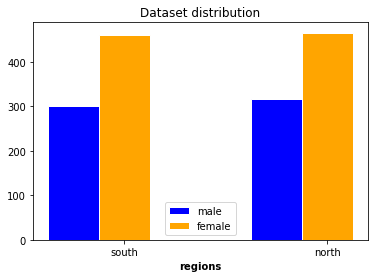

In [0]:
# set width of bar
barWidth = 0.25
 
# set height of bar
female = [460, 465]
male = [300, 317]
 
# Set position of bar on X axis
r1 = np.arange(len(male))
r2 = [x + barWidth for x in r1]

# 0 south
# 1 north

# 0 male
# 1 female
    
# Make the plot
plt.bar(r1, male, color='blue', width=barWidth, edgecolor='white', label='male')
plt.bar(r2, female, color='orange', width=barWidth, edgecolor='white', label='female')
 
# Add xticks on the middle of the group bars
plt.xlabel('regions', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(male))], ['south', 'north'])
 
plt.title('Dataset distribution')
# Create legend & Show graphic
plt.legend()
# plt.savefig('data_dist.png', dpi=200)

plt.show()

In [0]:
info_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1542 entries, 0 to 1646
Data columns (total 7 columns):
src-data              1542 non-null int64
region                1542 non-null float64
gender                1542 non-null int64
age                   354 non-null float64
weight                202 non-null float64
height                179 non-null float64
percentage-correct    1423 non-null float64
dtypes: float64(5), int64(2)
memory usage: 96.4 KB


In [0]:
#
# Making a DataFrame with only images and regions

no_of_rows = info['src-data'].count()
region_list = []

for i in range(no_of_rows):
    if info['region'][i] is not np.nan:
        region_list.append([i+1, info['region'][i]])

region_df = pd.DataFrame(region_list, columns = ['img', 'region'])
region_df

,img,region
0,1,1.0
1,2,NaN
2,3,1.0
3,4,NaN
4,5,0.0
5,6,0.0
6,7,NaN
7,8,0.0
8,9,0.0
9,10,NaN


In [0]:
#
# Removing NaN values from the DataFrame

img_region = region_df[pd.notnull(region_df['region'])]
img_region.reset_index(drop=True, inplace=True)
img_region

,img,region
0,1,1.0
1,3,1.0
2,5,0.0
3,6,0.0
4,8,0.0
5,9,0.0
6,11,0.0
7,12,0.0
8,13,0.0
9,14,0.0


In [0]:
#
# Make a new .csv with images and region data with no null values
img_region.to_csv('img_region.csv',sep=',',index=False)

In [0]:
print('Is CUDA available?', torch.cuda.is_available())
print('pytorch version:', torch.__version__)
torch.backends.cudnn.enabled

Is CUDA available? True
pytorch version: 1.0.1.post2


True

In [0]:
#
# files = [file for file in os.listdir('cnsifd-imgs') if os.path.isfile(os.path.join('cnsifd-imgs', file))]
file_names = ['img-'+str(i)+'.csv' for i in list(img_region['img'])]

for file in file_names:
    shutil.copy(os.path.join('cnsifd-imgs', file), 'imgs')

In [0]:
img_region = pd.read_csv('img_region.csv')
img_region

,img,region
0,1,1.0
1,3,1.0
2,5,0.0
3,6,0.0
4,8,0.0
5,9,0.0
6,11,0.0
7,12,0.0
8,13,0.0
9,14,0.0


**Labels**

*   *North* - 1
*   *South*  - 0



In [0]:
img_south = img_region[img_region['region']==0]
img_south

,img,region
2,5,0.0
3,6,0.0
4,8,0.0
5,9,0.0
6,11,0.0
7,12,0.0
8,13,0.0
9,14,0.0
10,15,0.0
11,16,0.0


In [0]:
img_north = img_region[img_region['region']==1]
img_north

,img,region
0,1,1.0
1,3,1.0
19,26,1.0
20,27,1.0
21,28,1.0
22,29,1.0
23,30,1.0
27,37,1.0
28,38,1.0
30,43,1.0


In [0]:
#
img_north.count()

img       782
region    782
dtype: int64

In [0]:
#
img_south.count()

img       760
region    760
dtype: int64

In [0]:
files_north = ['img-'+str(i)+'.csv' for i in list(img_north['img'])]
files_south = ['img-'+str(i)+'.csv' for i in list(img_south['img'])]

In [0]:
#
files_north

['img-1.csv',
 'img-3.csv',
 'img-26.csv',
 'img-27.csv',
 'img-28.csv',
 'img-29.csv',
 'img-30.csv',
 'img-37.csv',
 'img-38.csv',
 'img-43.csv',
 'img-44.csv',
 'img-46.csv',
 'img-48.csv',
 'img-53.csv',
 'img-55.csv',
 'img-57.csv',
 'img-58.csv',
 'img-59.csv',
 'img-60.csv',
 'img-63.csv',
 'img-64.csv',
 'img-65.csv',
 'img-68.csv',
 'img-77.csv',
 'img-82.csv',
 'img-86.csv',
 'img-88.csv',
 'img-89.csv',
 'img-93.csv',
 'img-97.csv',
 'img-98.csv',
 'img-101.csv',
 'img-102.csv',
 'img-104.csv',
 'img-108.csv',
 'img-114.csv',
 'img-117.csv',
 'img-119.csv',
 'img-120.csv',
 'img-121.csv',
 'img-122.csv',
 'img-123.csv',
 'img-124.csv',
 'img-125.csv',
 'img-126.csv',
 'img-142.csv',
 'img-152.csv',
 'img-154.csv',
 'img-159.csv',
 'img-161.csv',
 'img-170.csv',
 'img-173.csv',
 'img-174.csv',
 'img-182.csv',
 'img-190.csv',
 'img-231.csv',
 'img-265.csv',
 'img-290.csv',
 'img-302.csv',
 'img-303.csv',
 'img-304.csv',
 'img-305.csv',
 'img-307.csv',
 'img-308.csv',
 'img-309

In [0]:
#
files_south

['img-5.csv',
 'img-6.csv',
 'img-8.csv',
 'img-9.csv',
 'img-11.csv',
 'img-12.csv',
 'img-13.csv',
 'img-14.csv',
 'img-15.csv',
 'img-16.csv',
 'img-17.csv',
 'img-18.csv',
 'img-19.csv',
 'img-21.csv',
 'img-22.csv',
 'img-24.csv',
 'img-25.csv',
 'img-32.csv',
 'img-33.csv',
 'img-36.csv',
 'img-39.csv',
 'img-47.csv',
 'img-50.csv',
 'img-51.csv',
 'img-52.csv',
 'img-54.csv',
 'img-66.csv',
 'img-71.csv',
 'img-72.csv',
 'img-73.csv',
 'img-74.csv',
 'img-75.csv',
 'img-76.csv',
 'img-78.csv',
 'img-79.csv',
 'img-81.csv',
 'img-85.csv',
 'img-87.csv',
 'img-90.csv',
 'img-94.csv',
 'img-96.csv',
 'img-110.csv',
 'img-116.csv',
 'img-128.csv',
 'img-129.csv',
 'img-131.csv',
 'img-132.csv',
 'img-133.csv',
 'img-134.csv',
 'img-135.csv',
 'img-136.csv',
 'img-139.csv',
 'img-140.csv',
 'img-151.csv',
 'img-153.csv',
 'img-155.csv',
 'img-156.csv',
 'img-157.csv',
 'img-158.csv',
 'img-160.csv',
 'img-162.csv',
 'img-163.csv',
 'img-164.csv',
 'img-165.csv',
 'img-166.csv',
 'img

In [0]:
#
len(files_north)

782

In [0]:
#
len(files_south)

760

In [0]:
#
for file in files_north:
    shutil.copy(os.path.join('imgs', file), 'north')

In [0]:
#
for file in files_south:
    shutil.copy(os.path.join('imgs', file), 'south')

# Faces from the North

Random examples of some faces from the Northern part of India

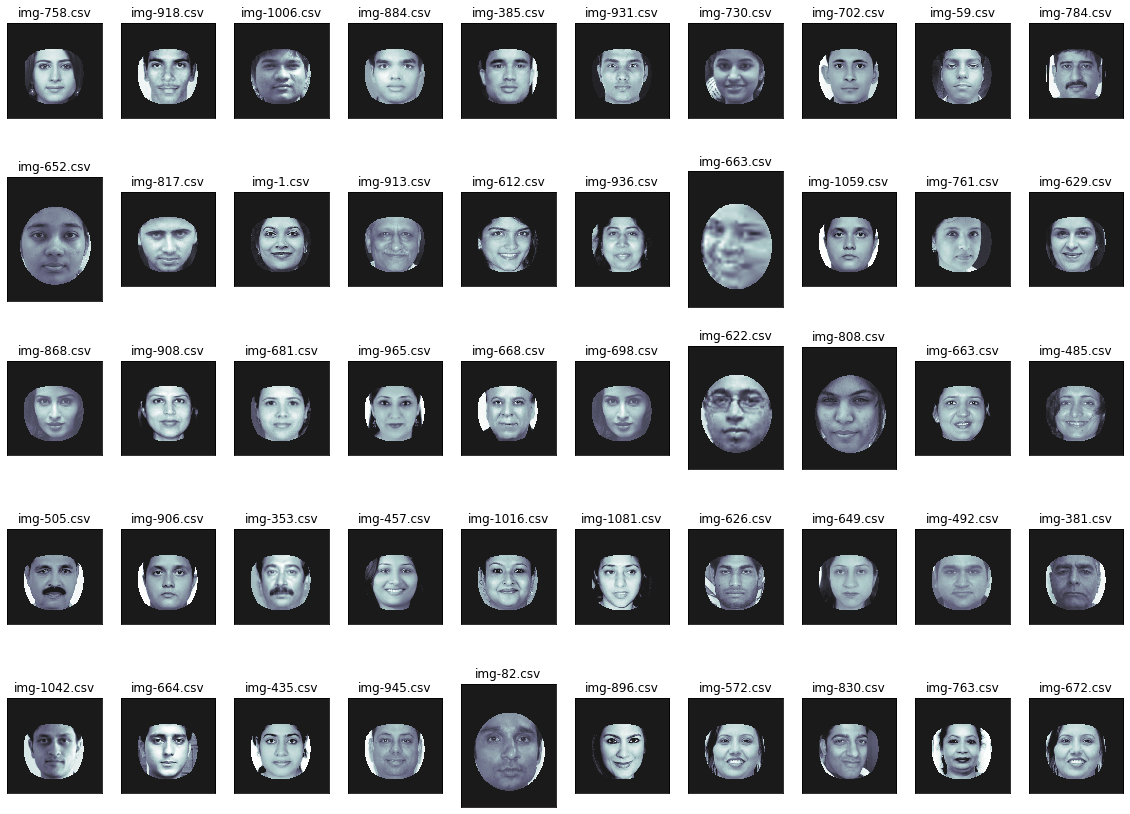

In [0]:
# Visualising north faces

fig = plt.figure(figsize=(20,15))
rows, cols = 5, 10

# ax enables access to manipulate each of subplots
ax = []

for i in range(cols*rows):
    img_i = files_north[random.randrange(len(files_north))]
    img = np.genfromtxt(path_north/img_i, delimiter=',')
    # create subplot and append to ax
    ax.append(fig.add_subplot(rows, cols, i+1))
    ax[-1].set_title(files_north[random.randrange(len(files_north))])  # set title
    img_fig = plt.imshow(img, alpha=0.90)
    # plot settings
    img_fig.set_cmap('bone')
    img_fig.axes.get_xaxis().set_visible(False)
    img_fig.axes.get_yaxis().set_visible(False)
    
plt.show()

# Faces from the South

Random examples of some faces from the Southern part of India

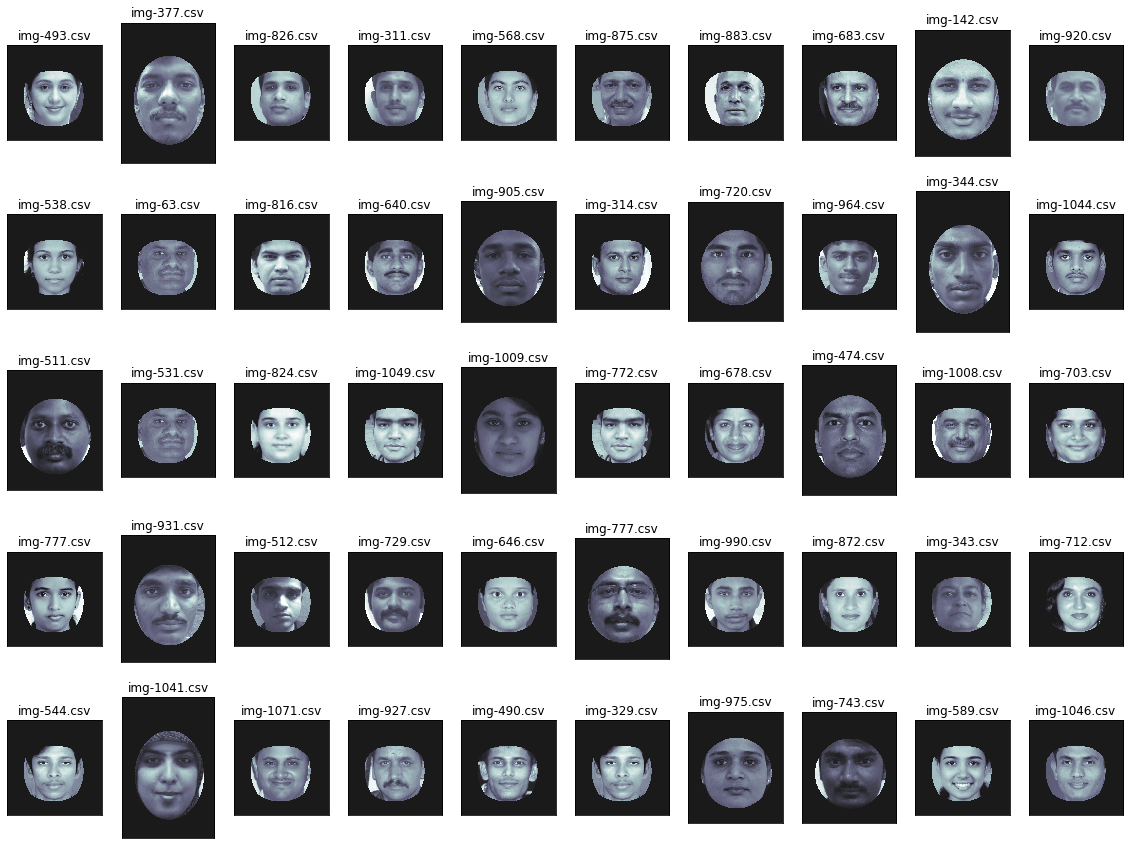

In [0]:
# Visualising south faces

fig = plt.figure(figsize=(20,15))
rows, cols = 5, 10

# ax enables access to manipulate each of subplots
ax = []

for i in range(cols*rows):
    img_i = files_south[random.randrange(len(files_south))]
    img = np.genfromtxt(path_south/img_i, delimiter=',')
    # create subplot and append to ax
    ax.append(fig.add_subplot(rows, cols, i+1))
    ax[-1].set_title(files_north[random.randrange(len(files_south))])  # set title
    img_fig = plt.imshow(img, alpha=0.90)
    # plot settings
    img_fig.set_cmap('bone')
    img_fig.axes.get_xaxis().set_visible(False)
    img_fig.axes.get_yaxis().set_visible(False)
    
plt.show()

In [0]:
!pip3 install split-folders

In [0]:
import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
# split_folders.ratio('input_folder', output="output", seed=1337, ratio=(.8, .1, .1)) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# split_folders.fixed('input_folder', output="output", seed=1337, fixed=(100, 100), oversample=False) # default values
split_folders.fixed('data-img', output='split-img', seed=1234, fixed=(125, 125), oversample=False)

In [0]:
path_train = path/'split-img'/'train'
path_valid = path/'split-img'/'val'

# Dataset size

**Test set**
*   North = 125
*   South = 125

**Validation set**
*   North = 125
*   South = 125

**Training set**
*   North = 532
*   South = 510

In [0]:
len((path_train/'north').ls())

532

In [0]:
len((path_train/'south').ls())

510

In [0]:
data = ImageDataBunch.from_folder(path/'split-img', train='train', valid='val', ds_tfms=get_transforms(), size=224)

# data = (ImageList.from_folder(path)
#         .split_by_rand_pct()
#         .split_by_folder(train=path_train, valid=path_valid)
#         .label_from_folder()
#         .transform(tfms, size=224)
#         .databunch())

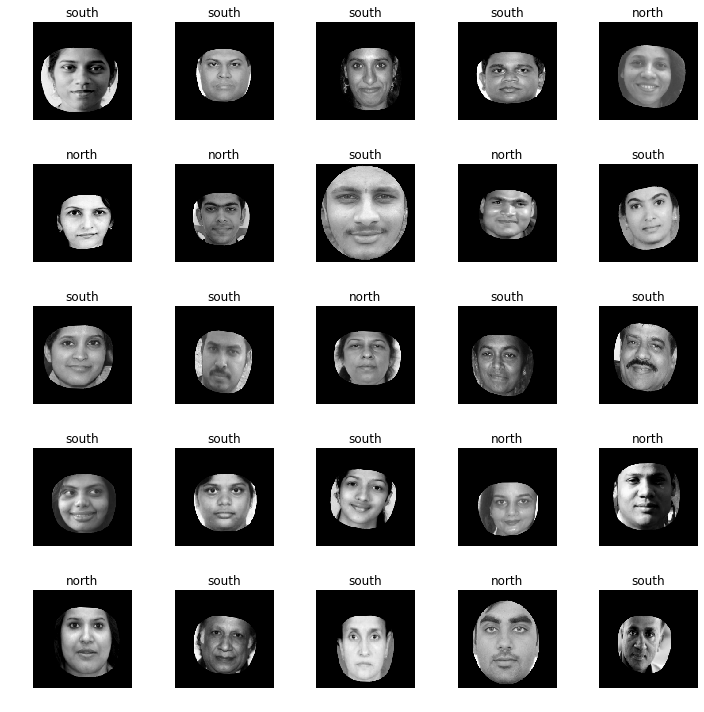

In [0]:
data.show_batch(rows=5, figsize=(10,10))

In [0]:
print(data.classes)
len(data.classes)

['north', 'south']


2

In [14]:
# learn = cnn_learner(data, models.resnet50, metrics=error_rate)
# learn = cnn_learner(data, models.resnet152, metrics=error_rate)

learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 80330358.55it/s]


In [15]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [19]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,error_rate,time
0,0.604884,0.595036,0.292000,00:22
1,0.619049,0.612900,0.328000,00:24
2,0.621219,0.660524,0.352000,00:22
3,0.614421,0.662915,0.336000,00:22
4,0.616867,0.620065,0.324000,00:24
5,0.604750,0.614765,0.348000,00:22
6,0.592632,0.602926,0.300000,00:22
7,0.582975,0.605512,0.300000,00:23
8,0.576039,0.618569,0.328000,00:23
9,0.561082,0.600792,0.292000,00:24


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
doc(interp.plot_top_losses)

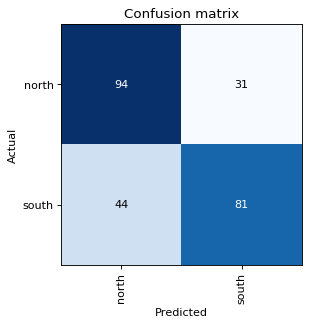

In [21]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=80)

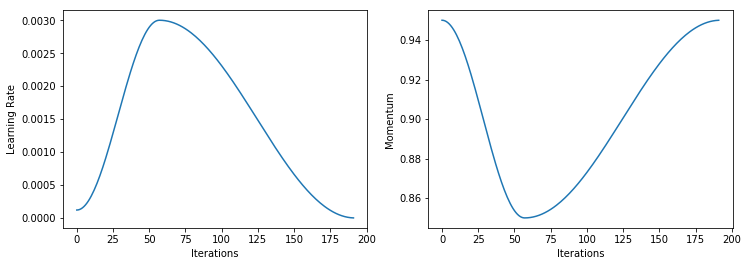

In [22]:
learn.recorder.plot_lr(show_moms=True)

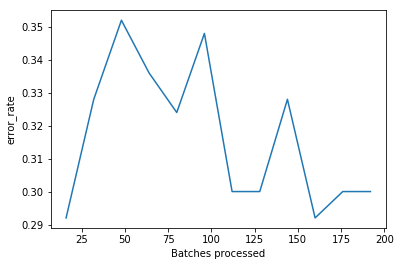

In [23]:
learn.recorder.plot_metrics()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


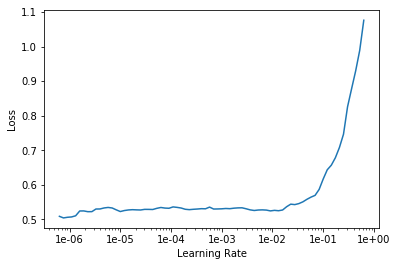

In [25]:
learn.recorder.plot()

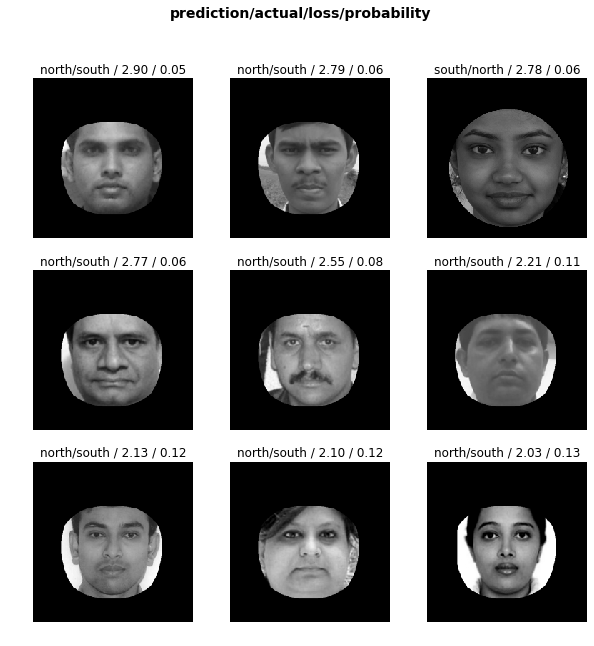

In [26]:
interp.plot_top_losses(9, heatmap=False, figsize=(10,10))